In [41]:
from keras.layers import Dense, Normalization
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [42]:
training_data = pd.read_csv("ScaledTrainingData.csv")
training_label = pd.read_csv("UnscaledTrainigData.csv")

In [43]:
model = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(training_data, training_label, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 8.4846e-04 - loss: 663.6785
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.0000e+00 - loss: 391.7512
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.0000e+00 - loss: 284.7022
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.0000e+00 - loss: 262.7985
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.0011 - loss: 263.4232    
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.0190 - loss: 256.7734
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.0254 - loss: 250.8953
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.0256 - loss: 245.1164
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.0300 - loss: 249.7268
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.0307 - loss: 245.1161
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0

In [45]:
test_data = pd.read_csv("ScaledTestData.csv")
test_label = pd.read_csv("UnscaledTestData.csv")

In [46]:
test_loss, test_accuracy = model.evaluate(test_data, test_label)
print(test_loss)
print(test_accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.0071 - loss: 142.8539   
194.55715942382812
0.029680365696549416


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step


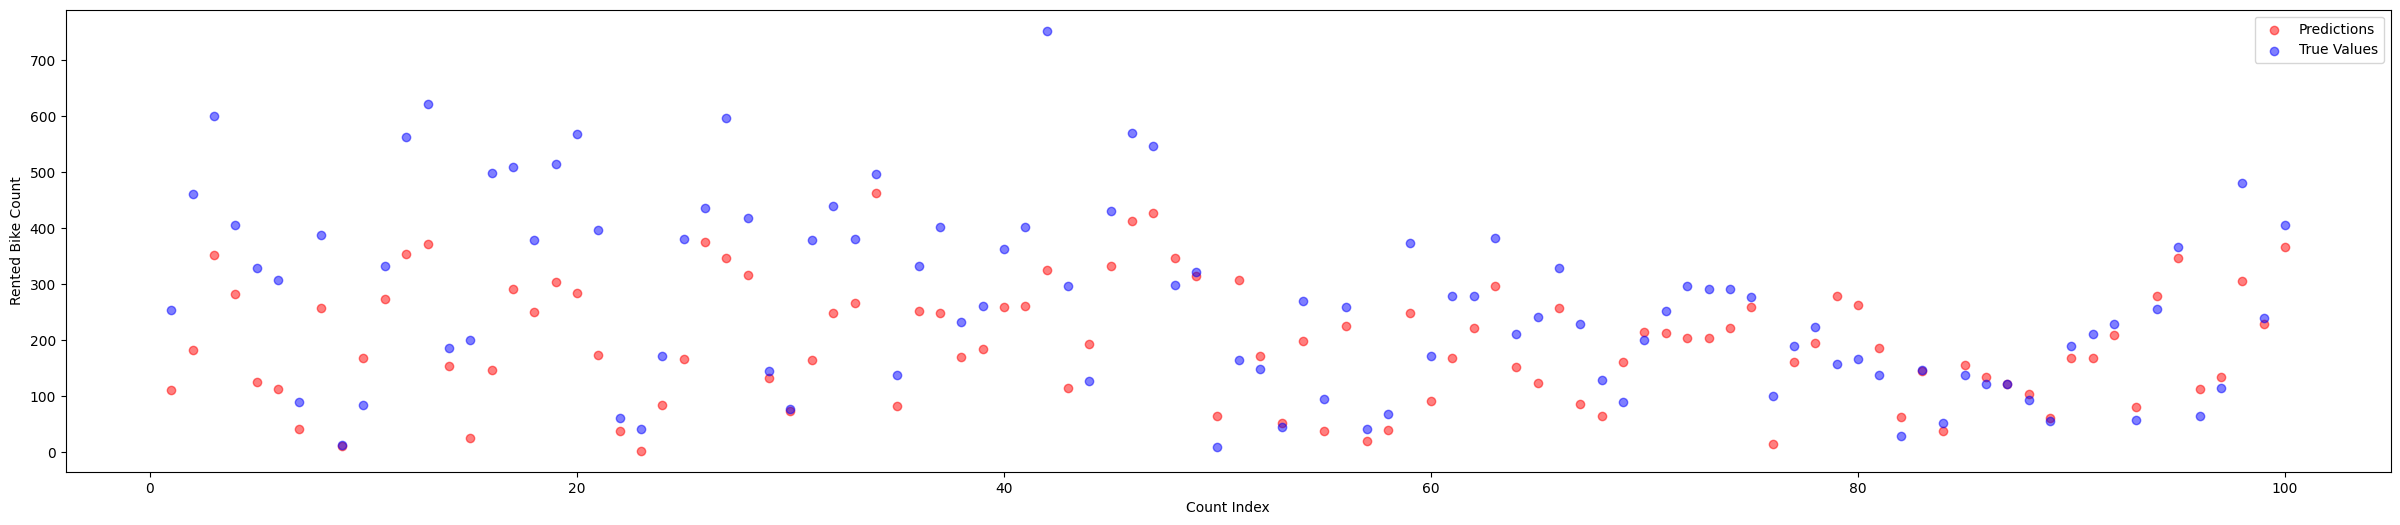

In [47]:
test_predictions = model.predict(test_data).flatten()

fig, ax = plt.subplots(figsize=(30, 6))
a = ax
ax.scatter(range(1, 101), test_predictions[:100], color='red', alpha=0.5, label='Predictions')
ax.scatter(range(1, 101), test_label.iloc[:100, 0], color='blue', alpha=0.5, label='True Values')
ax.set_xlabel('Count Index')
ax.set_ylabel('Rented Bike Count')
ax.legend()
plt.show()

1752


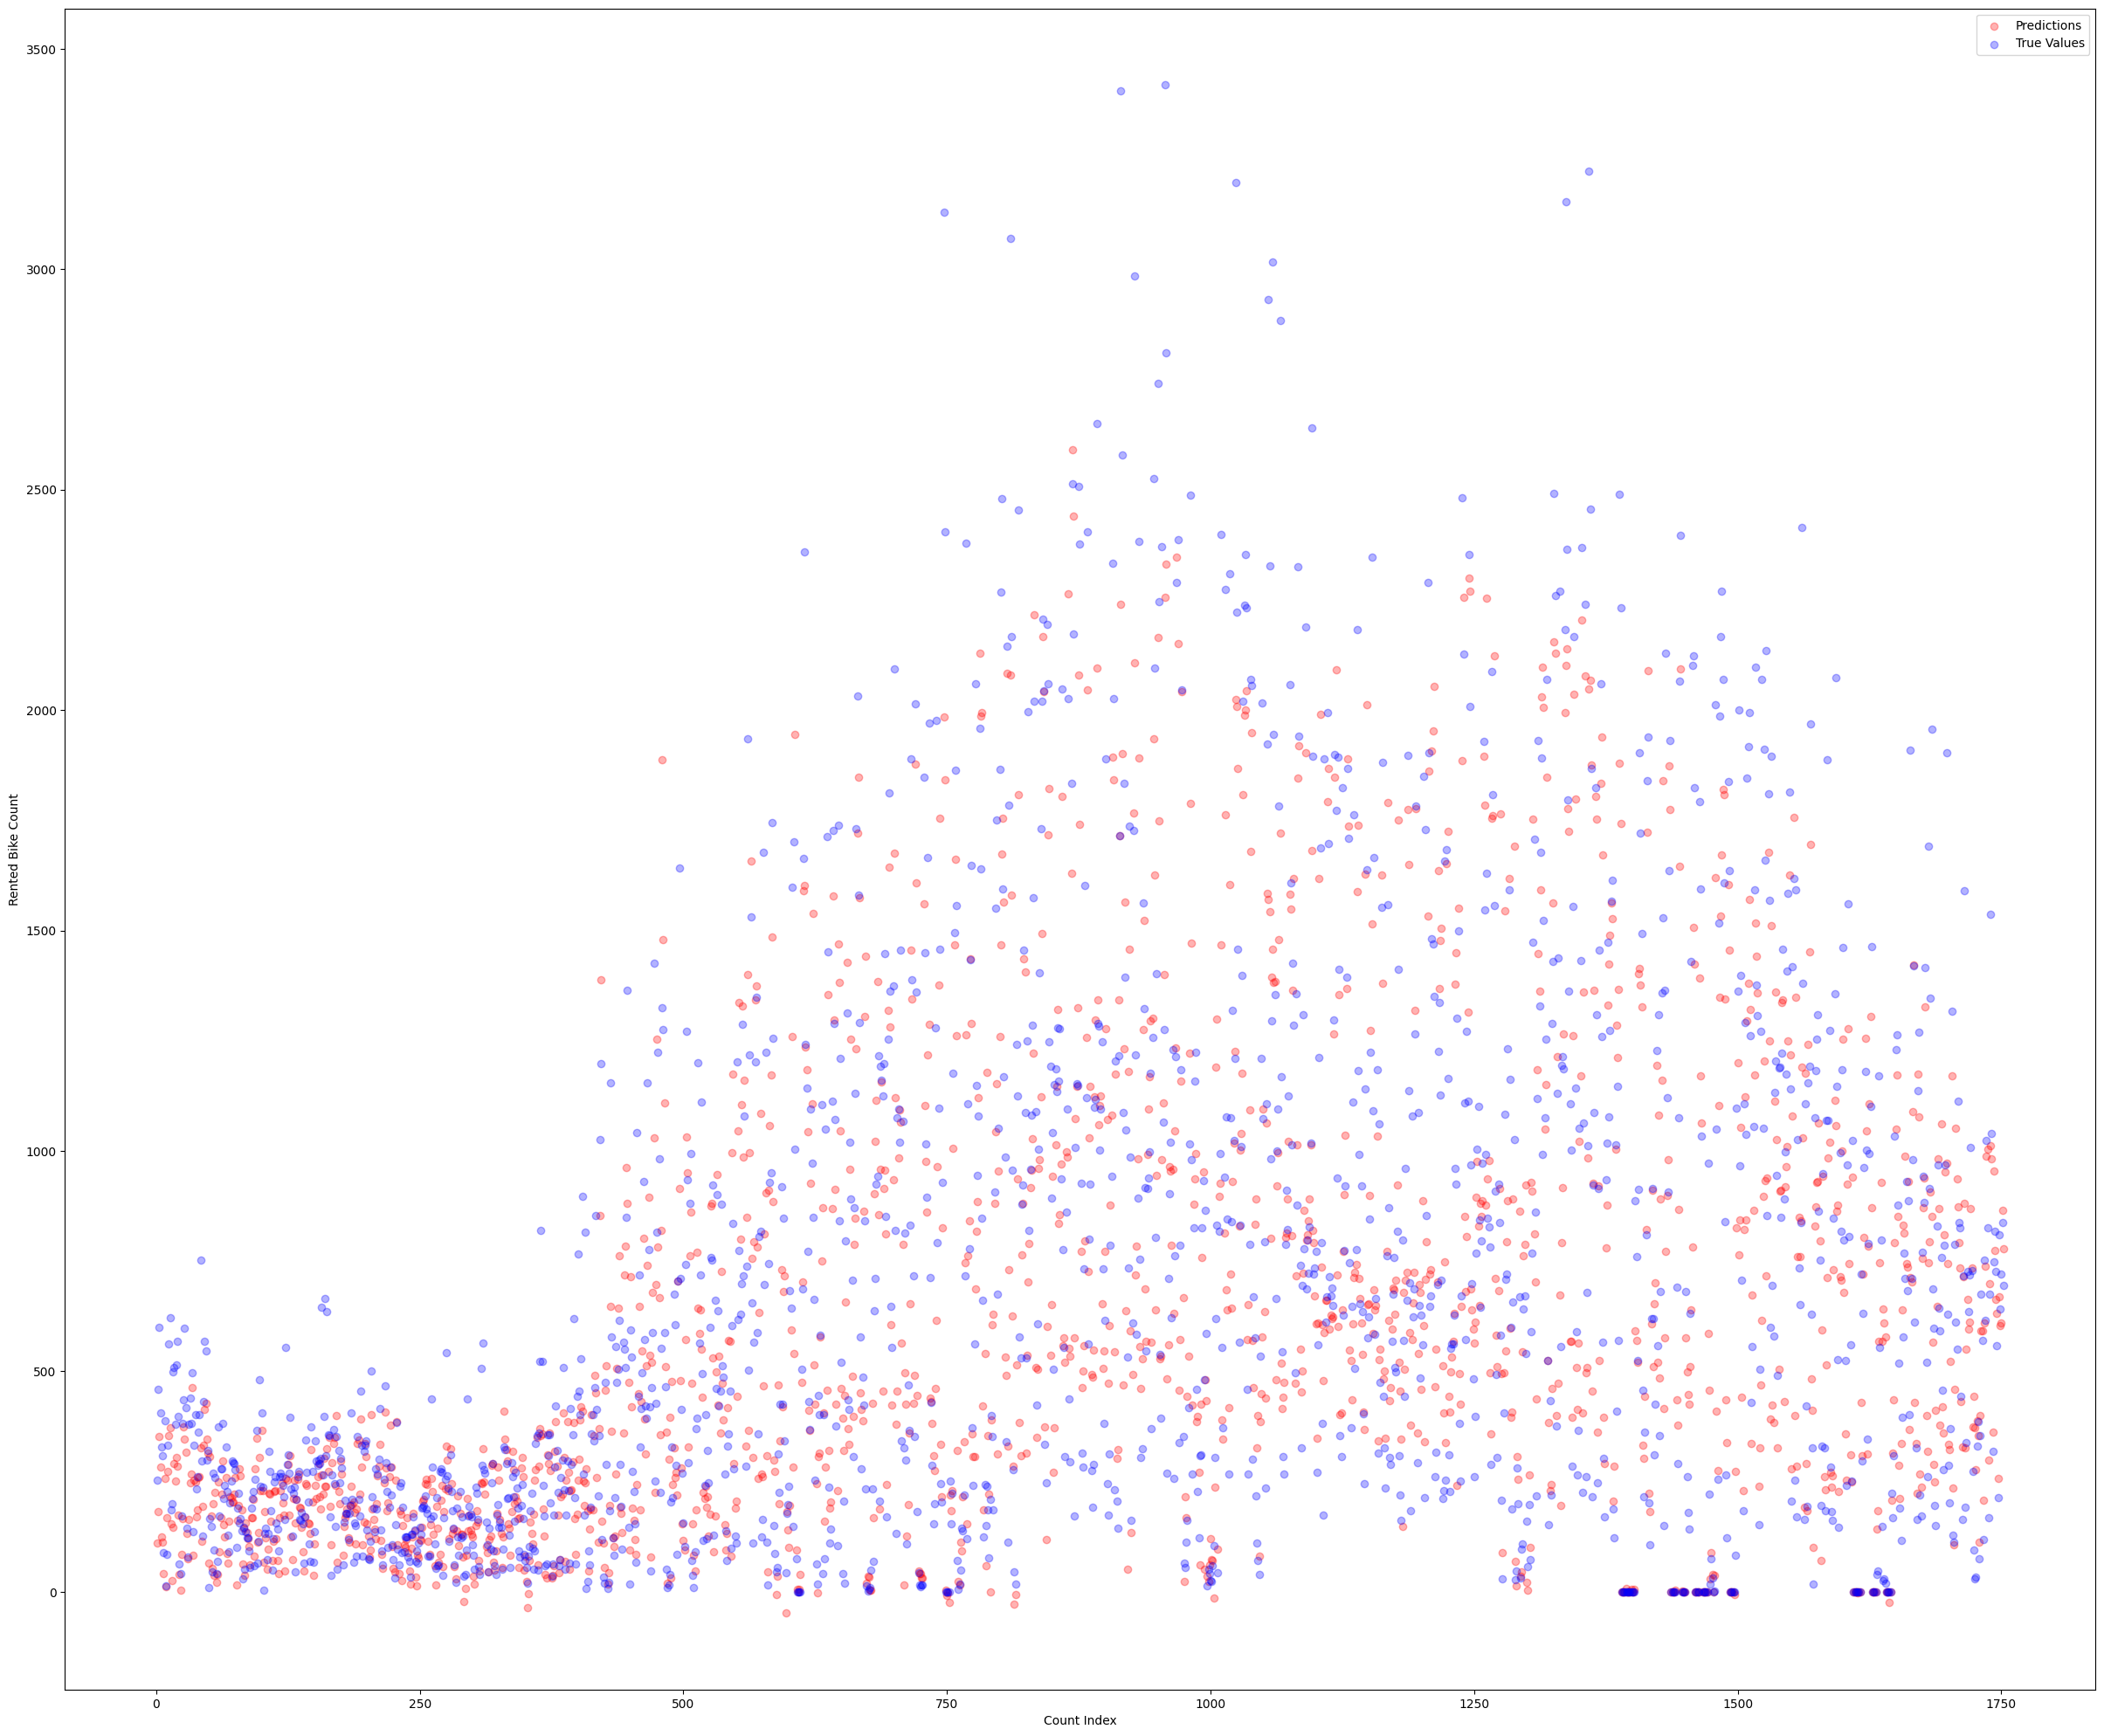

In [48]:
fig, ax = plt.subplots(figsize=(30, 25))
a = ax
ax.scatter(range(1, 1753), test_predictions, color='red', alpha=0.3, label='Predictions')
ax.scatter(range(1, 1753), test_label, color='blue', alpha=0.3, label='True Values')
print(len(test_label))
ax.set_xlabel('Count Index')
ax.set_ylabel('Rented Bike Count')
ax.legend()
plt.show()

In [49]:
mae = mean_absolute_error(test_label, test_predictions)
rmse = np.sqrt(mean_squared_error(test_label, test_predictions))
r2 = r2_score(test_label, test_predictions)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 194.55711364746094
RMSE: 315.9148174350168
R2: 0.763242244720459
